In [1]:
import pickle
import pandas as pd
import seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATE = '20231104'

QPATH = 'Quantlet/4-seq2seq'

import sys
IN_COLAB = 'google.colab' in sys.modules

import os
if IN_COLAB:
  os.chdir(f'/content/drive/MyDrive/ColabNotebooks/IRTG/Encode_the_Qode/Encode-the-Qode/{QPATH}')

In [4]:
with open('results_dict.pickle', 'rb') as handle:
  results_dict = pickle.load(handle)

In [5]:
results_dict

{0: {'train_loss': [6.172951314881531,
   5.6841436875493905,
   5.353979988753447,
   5.054629951192622,
   4.769643263161531,
   4.530836147174501,
   4.314983228493852,
   4.117898211841695,
   3.9395994603285316,
   3.7898990274869906],
  'valid_loss': [5.786756112978056,
   5.616268455208122,
   5.529549843305118,
   5.373143694617531,
   5.422051445230261,
   5.362096591429277,
   5.358915428062538,
   5.317869619889692,
   5.284537798398501,
   5.3355256644162266],
  'train_rouge': [0.0243,
   0.0253,
   0.0265,
   0.0315,
   0.0347,
   0.0374,
   0.0403,
   0.0403,
   0.0421,
   0.0429],
  'val_rouge': [0.0239,
   0.0232,
   0.0239,
   0.0277,
   0.0321,
   0.0345,
   0.0376,
   0.0361,
   0.0372,
   0.0365],
  'test_rouge': [0.0217,
   0.0231,
   0.0213,
   0.0286,
   0.0304,
   0.0328,
   0.0341,
   0.0338,
   0.0348,
   0.0355]},
 1: {'train_loss': [6.154030565629926,
   5.637115763641938,
   5.321207834963213,
   5.023377419215197,
   4.747565717202181,
   4.490509906881734

In [ ]:
train = pd.read_csv(f'../../data/preprocessed/Quantlet/{DATE}/train_with_epoch_preds_0.csv')
val = pd.read_csv(f'../../data/preprocessed/Quantlet/{DATE}/val_with_epoch_preds.csv_0')
test = pd.read_csv(f'../../data/preprocessed/Quantlet/{DATE}/test_with_epoch_preds.csv_0')

In [ ]:
with open(f'../../data/preprocessed/Quantlet/{DATE}/results_dict.pickle', 'rb') as handle:
    results_dict = pickle.load(handle)

In [11]:
def parse_to_df(results_dict: dict) -> pd.DataFrame:
  full_results = pd.DataFrame()
  for run in results_dict.keys():
    results_df = pd.DataFrame(results_dict[run])
    results_df['run'] = str(run)
    full_results = pd.concat([full_results, results_df], axis=0)

  full_results['steps'] = full_results.index
  full_results = full_results.reset_index(drop=True)

  stacked_df = pd.DataFrame()
  for variable in ['train_rouge', 'val_rouge', 'train_loss', 'valid_loss']:
      tr_df = full_results[[variable, 'run', 'steps']]
      tr_df['variable'] = variable
      tr_df = tr_df.rename(columns={variable : 'value'})
      stacked_df = pd.concat([stacked_df, tr_df], axis=0)
  return stacked_df

In [12]:
results_df = parse_to_df(results_dict)

<ipython-input-11-3c4804e605bb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df['variable'] = variable
<ipython-input-11-3c4804e605bb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df['variable'] = variable
<ipython-input-11-3c4804e605bb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [13]:
results_df[results_df.run=='0']

,value,run,steps,variable
0,0.024300,0,0,train_rouge
1,0.025300,0,1,train_rouge
2,0.026500,0,2,train_rouge
3,0.031500,0,3,train_rouge
4,0.034700,0,4,train_rouge
5,0.037400,0,5,train_rouge
6,0.040300,0,6,train_rouge
7,0.040300,0,7,train_rouge
8,0.042100,0,8,train_rouge
9,0.042900,0,9,train_rouge


In [14]:
any(results_df.isna())

True

In [15]:
results_df.value = results_df.value.astype(np.float32)

In [16]:
rouge_df = results_df.query('variable.str.contains("rouge")')
loss_df = results_df.query('variable.str.contains("loss")')

<ipython-input-18-74f29add2766>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


[Text(0.5, 0, 'Training Epochs'), Text(0, 0.5, 'Value')]

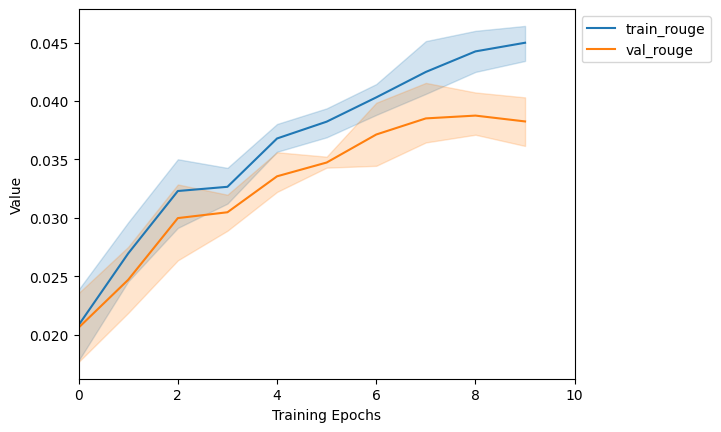

In [18]:
g = sns.lineplot(x="steps", y="value",
             hue="variable", #style="variable",
             data=rouge_df)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (0, 10))
xlabels = [int(x)  for x in g.get_xticks()]
g.set_xticklabels(xlabels)
g.set(xlabel='Training Epochs', ylabel='Value')

<ipython-input-19-3a25a907e455>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


[Text(0.5, 0, 'Training Epochs'), Text(0, 0.5, 'Value')]

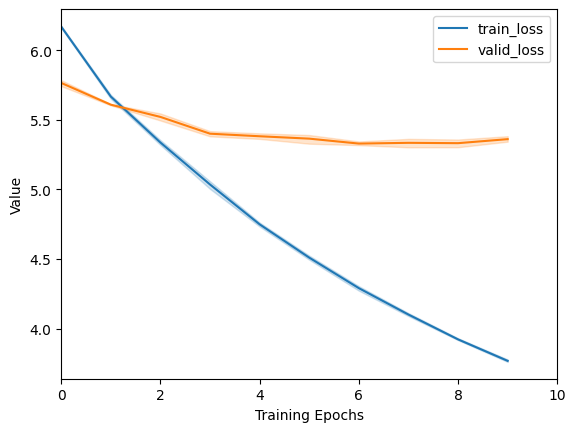

In [19]:
g = sns.lineplot(x="steps", y="value",
             hue="variable", #style="variable",
             data=loss_df)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (0, 10))
xlabels = [int(x)  for x in g.get_xticks()]
g.set_xticklabels(xlabels)
g.set(xlabel='Training Epochs', ylabel='Value')

In [20]:
palette_rouge = sns.color_palette("rocket_r", 2)
palette_loss = sns.color_palette("viridis", 2)

<ipython-input-24-145f2cbf622b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)
<ipython-input-24-145f2cbf622b>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_xticklabels(xlabels)


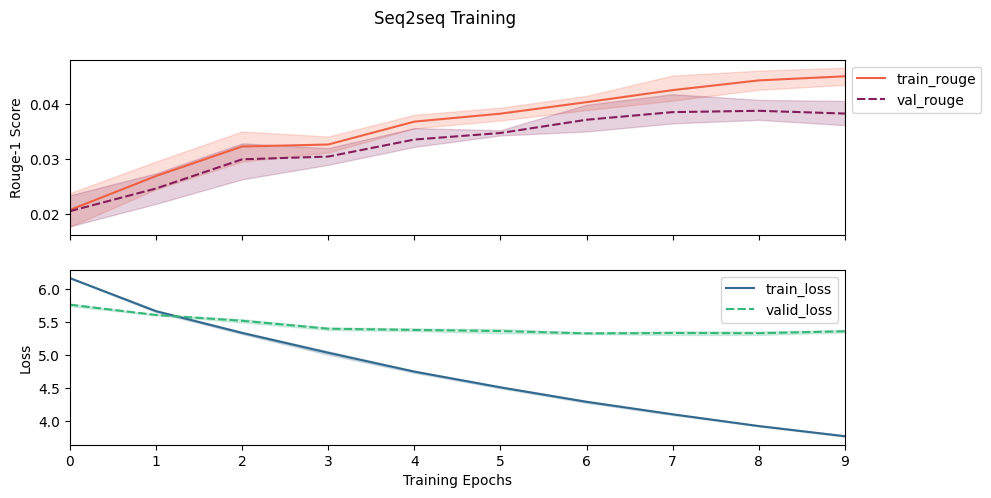

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
fig.suptitle('Seq2seq Training')

g = sns.lineplot(ax=axes[0], x="steps", y="value",
             hue="variable", style="variable",
             data=rouge_df, palette=palette_rouge)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (0, 9))
xlabels = [int(x)  for x in g.get_xticks()]
g.set_xticklabels(xlabels)
g.set(xlabel='Training Epochs', ylabel='Rouge-1 Score')

g2 = sns.lineplot(ax=axes[1], x="steps", y="value",
             hue="variable", style="variable",
             data=loss_df, palette=palette_loss)
g2.legend(bbox_to_anchor=(1, 1), ncol=1)
g2.set(xlim = (0, 9))
xlabels = [int(x)  for x in g2.get_xticks()]
g2.set_xticklabels(xlabels)
g2.set(xlabel='Training Epochs', ylabel='Loss')
plt.savefig('seq2seq_training_with_legend.pdf', format='pdf', transparent=True)

<ipython-input-25-2f7e8917e42b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)
<ipython-input-25-2f7e8917e42b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_xticklabels(xlabels)


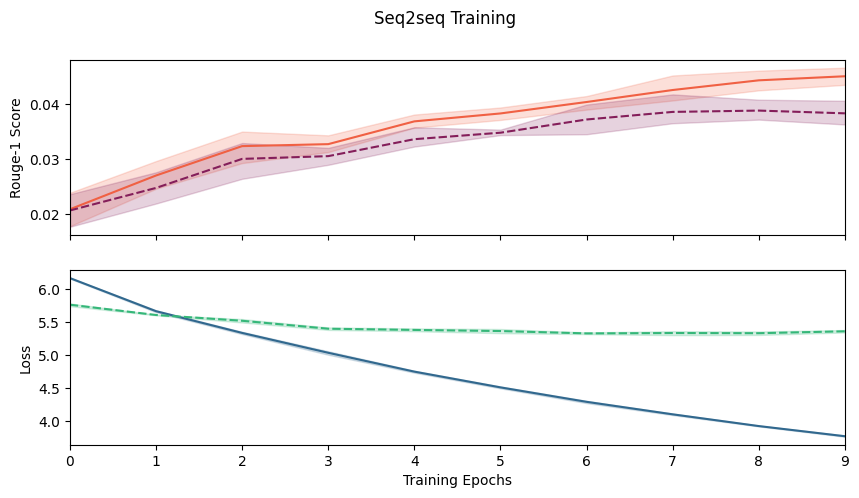

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
fig.suptitle('Seq2seq Training')

g = sns.lineplot(ax=axes[0], x="steps", y="value",
             hue="variable", style="variable",
             data=rouge_df, palette=palette_rouge)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (0, 9))
xlabels = [int(x)  for x in g.get_xticks()]
g.set_xticklabels(xlabels)
g.set(xlabel='Training Epochs', ylabel='Rouge-1 Score')
g.get_legend().remove()

g2 = sns.lineplot(ax=axes[1], x="steps", y="value",
             hue="variable", style="variable",
             data=loss_df, palette=palette_loss)
g2.legend(bbox_to_anchor=(1, 1), ncol=1)
g2.set(xlim = (0, 9))
xlabels = [int(x)  for x in g2.get_xticks()]
g2.set_xticklabels(xlabels)
g2.set(xlabel='Training Epochs', ylabel='Loss')
g2.get_legend().remove()
plt.savefig('seq2seq_training.pdf', format='pdf', transparent=True)